In [216]:
martini2 = [10000,40000,28000,18000,20000,11000,60000,60000,60000,60000,40000,40000,60000,60000,
            60000,60000,40000,40000,60000,60000,60000,60000,60000,60000]
K_boltzmann = [7538.791985,37041.7569,5473.820313,26750.24489,142.9286624,10977.80691,19801.40344,
               36879.00546,24319.37415,44571.1832,31810.476,32666.67403,53086.62883,1894.948061,
               40100.78068,72650.62202,50198.40179,53081.87911,182.5401798,36863.21938,40782.90211,
               84528.27601,41133.69392,46244.07767]

import numpy as np
np.corrcoef(martini2, K_boltzmann)

array([[1.        , 0.45720631],
       [0.45720631, 1.        ]])

In [4]:
martini_data = [0.363,0.202,0.293,0.286,0.292,0.28,0.234,0.263,0.299,0.162,0.335,0.32,0.296,0.291,0.296,0.162,0.385,0.32,0.224,0.281,0.267,0.224,0.289,0.276,0.354]
boltzmann_dist_data = [0.407713445,0.240216956,0.343448102,0.329894573,0.525525345,0.330125308,
                       0.233217213,0.269362292,0.295848259,0.162829001,0.329688086,0.341282879,
                       0.29522389,0.245692172,0.291034438,0.162940589,0.389827467,0.339710294,
                       0.055982705,0.285937434,0.267677625,0.221067451,0.268600881,0.20968964,0.506]
gaussian_dist_data = [0.412558467,0.236942976,0.338189474,0.329147264,0.338049492,0.328881889,
                      0.231969438,0.269096832,0.294355397,0.163957088,0.328951661,0.340896505,
                      0.295066947,0.293022854,0.291067187,0.163025494,0.389928094,0.339014621,
                      0.223939049,0.285943739,0.267981535,0.221055534,0.268946216,0.209043448,
                      0.330715567]

correlation of distance : martini2 vs boltzmann
[[1.         0.74387627]
 [0.74387627 1.        ]]
correlation of distance : gaussian vs boltzmann
[[1.         0.80182305]
 [0.80182305 1.        ]]


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
distance_dict = dict.fromkeys(['BB1_BB2','BB2_BB3','BB3_ASC1','ASC2_ASC4','ASC1_ASC3','ASC1_ASC2','ASC2_ASC3','ASC3_ASC4',\
'ASC4_ASC1','BB3_USC1','USC1_USC2','USC2_USC3','USC3_USC1','BB3_GSC1','GSC2_GSC4','GSC1_GSC3','GSC1_GSC2','GSC2_GSC3',\
'GSC3_GSC4','GSC4_GSC1','BB3_CSC1','CSC1_CSC2','CSC2_CSC3','CSC3_CSC1'])

In [3]:
distance_parameters = pd.DataFrame()
distance_parameters_dict = {'Parameter':[],'raw data mean value':[],
                            'raw data mode value gaussian-fitted mode value':[],
                           'Seed value obtained using BOltzmann inversion':[],
                           'K from boltzmann inversion':[]}

In [4]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [7]:
# df_Hmapped_distance_7w0f = pd.read_csv('piRNA_simu_files/3O3I/dist_final.xvg')
# df_Hmapped_distance_all = pd.read_csv('dist_final_allmolecules.csv')

df_Hmapped_distance_all = pd.read_excel('/home/subhasree/IISC_Bangalore/My_PhD_Studies/Lab_work/CG_Models/PDB_files/experimental_data_bonded_params.xlsx',
                                        sheet_name="all_bond_dis",engine="openpyxl")

In [8]:
df_Hmapped_distance_all.columns

Index(['BB1_BB2', 'BB2_BB3', 'BB3_ASC1', 'ASC2_ASC4', 'ASC1_ASC3', 'ASC1_ASC2',
       'ASC2_ASC3', 'ASC3_ASC4', 'ASC4_ASC1', 'BB3_USC1', 'USC1_USC2',
       'USC2_USC3', 'USC3_USC1', 'BB3_GSC1', 'GSC2_GSC4', 'GSC1_GSC3',
       'GSC1_GSC2', 'GSC2_GSC3', 'GSC3_GSC4', 'GSC4_GSC1', 'BB3_CSC1',
       'CSC1_CSC2', 'CSC2_CSC3', 'CSC3_CSC1', 'BB3_pBB1'],
      dtype='object')

In [9]:
# 1rpu  1si3  2f8s  3cz3  4ngd  4nh3  5n8l  6bjv  6ra4  7w0f
BB1_BB2_Hmapped_distance_all = df_Hmapped_distance_all['BB1_BB2']
BB2_BB3_Hmapped_distance_all = df_Hmapped_distance_all['BB2_BB3']
BB3_ASC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_ASC1']
BB3_USC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_USC1']
BB3_GSC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_GSC1']
BB3_CSC1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_CSC1']
ASC1_ASC2_Hmapped_distance_all = df_Hmapped_distance_all['ASC1_ASC2']
ASC2_ASC3_Hmapped_distance_all = df_Hmapped_distance_all['ASC2_ASC3']
ASC3_ASC4_Hmapped_distance_all = df_Hmapped_distance_all['ASC3_ASC4']
ASC4_ASC1_Hmapped_distance_all = df_Hmapped_distance_all['ASC4_ASC1']
ASC2_ASC4_Hmapped_distance_all = df_Hmapped_distance_all['ASC2_ASC4']
ASC1_ASC3_Hmapped_distance_all = df_Hmapped_distance_all['ASC1_ASC3']
GSC1_GSC2_Hmapped_distance_all = df_Hmapped_distance_all['GSC1_GSC2']
GSC2_GSC3_Hmapped_distance_all = df_Hmapped_distance_all['GSC2_GSC3']
GSC3_GSC4_Hmapped_distance_all = df_Hmapped_distance_all['GSC3_GSC4']
GSC4_GSC1_Hmapped_distance_all = df_Hmapped_distance_all['GSC4_GSC1']
GSC2_GSC4_Hmapped_distance_all = df_Hmapped_distance_all['GSC2_GSC4']
GSC1_GSC3_Hmapped_distance_all = df_Hmapped_distance_all['GSC1_GSC3']
CSC1_CSC2_Hmapped_distance_all = df_Hmapped_distance_all['CSC1_CSC2']
CSC2_CSC3_Hmapped_distance_all = df_Hmapped_distance_all['CSC2_CSC3']
CSC3_CSC1_Hmapped_distance_all = df_Hmapped_distance_all['CSC3_CSC1']
USC1_USC2_Hmapped_distance_all = df_Hmapped_distance_all['USC1_USC2']
USC2_USC3_Hmapped_distance_all = df_Hmapped_distance_all['USC2_USC3']
USC3_USC1_Hmapped_distance_all = df_Hmapped_distance_all['USC3_USC1']
BB3_pBB1_Hmapped_distance_all = df_Hmapped_distance_all['BB3_pBB1']

In [10]:
def return_modes_of_data(data):   
    data = data
    n = np.histogram(data)
    count_dict = {}
    for i in range(0,len(n[0])):
        count_dict[n[0][i]] = n[1][i]
    return sorted(count_dict.items()),data.mean()

In [11]:
def P2U(p):
     boltzmann = 1.9858285706E-3 # Kcal/K
     T = 298.15 # K
     p_max = p.max()
     return - boltzmann * T * np.log(p / p_max)

In [12]:
def harmonic(r, r0, k):
     return 0.5 * k * (r - r0) ** 2

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_pBB1_Hmapped_distance_all
Mean: Raw data 0.35175
Mode: Raw data 0.33948032985682636
Mode: Gauss-fitted 0.33948032985682636


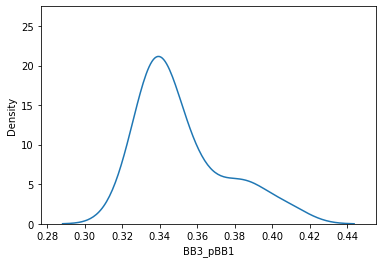

In [13]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_pBB1_Hmapped_distance_all)
xmean = np.mean(BB3_pBB1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_pBB1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_pBB1_Hmapped_distance_all,bw=0.5)
# 
# 
# 

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
# 
print("BB3_pBB1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.361825970355212
parameter K is:  1161.8950527660757


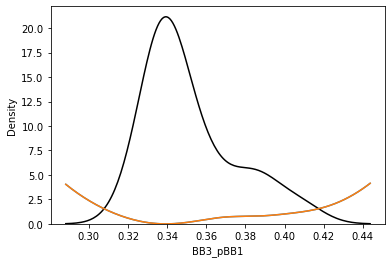

In [14]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_pBB1_Hmapped_distance_all,bw=0.5,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])


distance_parameters_dict['Parameter'].append('BB3_pBB1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB1_BB2_Hmapped_distance_all
Mean: Raw data 0.32434999999999997
Mode: Raw data 0.3255864803173966
Mode: Gauss-fitted 0.3255864803173966


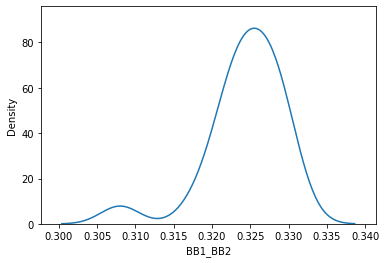

In [15]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB1_BB2_Hmapped_distance_all)
xmean = np.mean(BB1_BB2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB1_BB2_Hmapped_distance_all, kde=True, 
            norm_hist=False,color='white',
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB1_BB2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB1_BB2_Hmapped_distance_all,bw=0.5)
# 
# 
# 

x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)
# 
print("BB1_BB2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


parameter R_o is:  0.3782547632098082
parameter K is:  735.9380300463788


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


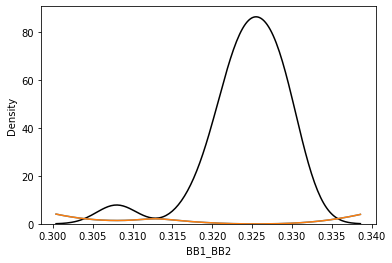

In [16]:
#get probability distribution from data
plt2 = sns.kdeplot(BB1_BB2_Hmapped_distance_all,bw=0.5,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.41, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])


distance_parameters_dict['Parameter'].append('BB1_BB2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB2_BB3_Hmapped_distance_all
Mean: Raw data 0.27045
Mode: Raw data 0.2691537252876958
Mode: Gauss-fitted 0.2691537252876958


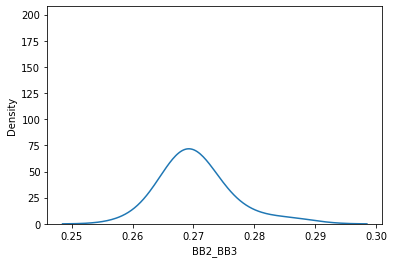

In [17]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB2_BB3_Hmapped_distance_all)
xmean = np.mean(BB2_BB3_Hmapped_distance_all)
xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB2_BB3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB2_BB3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB2_BB3_Hmapped_distance_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB2_BB3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.07903796385575985
parameter K is:  76.96875835634263


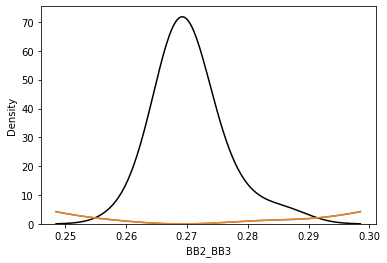

In [18]:
#get probability distribution from data
plt2 = sns.kdeplot(BB2_BB3_Hmapped_distance_all,bw=0.8,color='black')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.24, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB2_BB3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_ASC1_Hmapped_distance_all
Mean: Raw data 0.3385500000000001
Mode: Raw data 0.338386573596798
Mode: Gauss-fitted 0.338386573596798


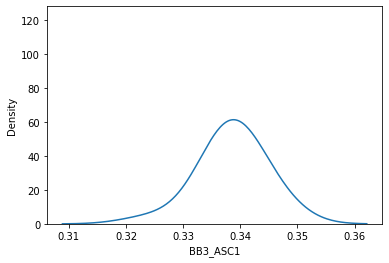

In [19]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_ASC1_Hmapped_distance_all)
xmean = np.mean(BB3_ASC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_ASC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_ASC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_ASC1_Hmapped_distance_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_ASC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.33707948864604026
parameter K is:  11133.408484831503


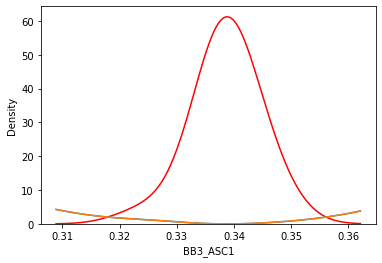

In [20]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_ASC1_Hmapped_distance_all,bw=1,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 20000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_ASC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_USC1_Hmapped_distance_all
Mean: Raw data 0.33035000000000003
Mode: Raw data 0.33102862788483545
Mode: Gauss-fitted 0.33102862788483545


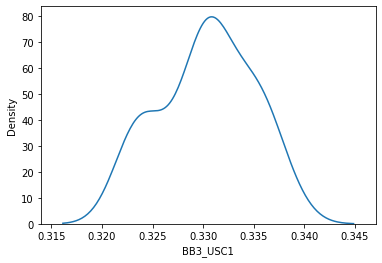

In [21]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_USC1_Hmapped_distance_all)
xmean = np.mean(BB3_USC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(BB3_USC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_USC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_USC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_USC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.33003272780321613
parameter K is:  29180.783829839922


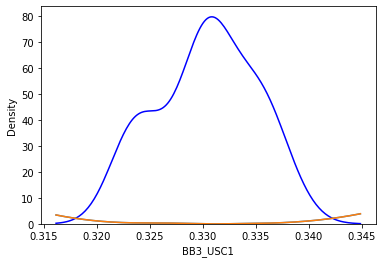

In [22]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_USC1_Hmapped_distance_all,bw=0.5,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_USC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_GSC1_Hmapped_distance_all
Mean: Raw data 0.33715
Mode: Raw data 0.33551315994336206
Mode: Gauss-fitted 0.33551315994336206


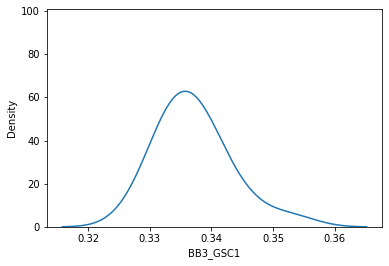

In [23]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_GSC1_Hmapped_distance_all)
xmean = np.mean(BB3_GSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_GSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_GSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_GSC1_Hmapped_distance_all,bw=0.7)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_GSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.7 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.33934136364910356
parameter K is:  12373.420137399482


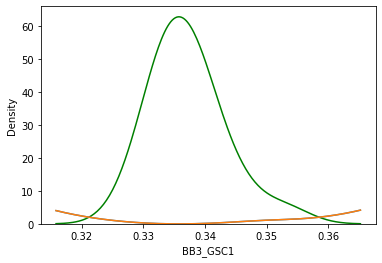

In [24]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_GSC1_Hmapped_distance_all,bw=0.7,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_GSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


BB3_CSC1_Hmapped_distance_all
Mean: Raw data 0.33175
Mode: Raw data 0.3315384296819497
Mode: Gauss-fitted 0.3315384296819497


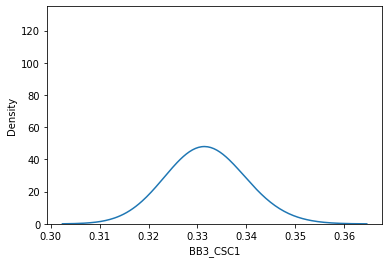

In [25]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(BB3_CSC1_Hmapped_distance_all)
xmean = np.mean(BB3_CSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(BB3_CSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(BB3_CSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(BB3_CSC1_Hmapped_distance_all,bw=1.4)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("BB3_CSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.4 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.33238036954787603
parameter K is:  8378.918496299751


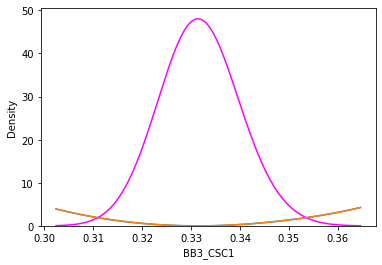

In [26]:
#get probability distribution from data
plt2 = sns.kdeplot(BB3_CSC1_Hmapped_distance_all,bw=1.4,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 800])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('BB3_CSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC2_Hmapped_distance_all
Mean: Raw data 0.2347
Mode: Raw data 0.23358774765541612
Mode: Gauss-fitted 0.23358774765541612


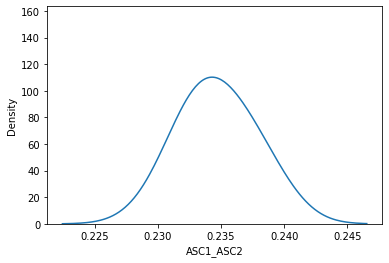

In [27]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC2_Hmapped_distance_all)
xmean = np.mean(ASC1_ASC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC2_Hmapped_distance_all,bw=1)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2348154419325672
parameter K is:  50858.1559339749


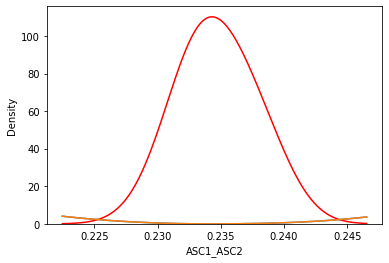

In [28]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC2_Hmapped_distance_all,bw=1,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.232, 10000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC1_ASC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC3_Hmapped_distance_all
Mean: Raw data 0.27105
Mode: Raw data 0.2692849928418799
Mode: Gauss-fitted 0.2692849928418799


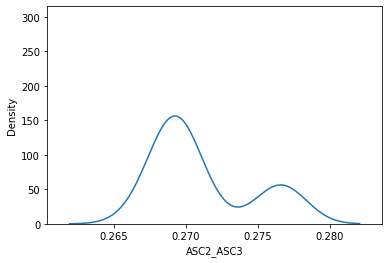

In [29]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC3_Hmapped_distance_all)
xmean = np.mean(ASC2_ASC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2721136714769813
parameter K is:  63334.95413351929


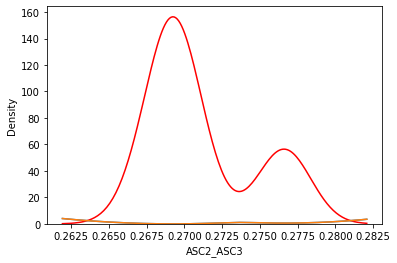

In [30]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC3_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.27, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC2_ASC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC3_ASC4_Hmapped_distance_all
Mean: Raw data 0.29584999999999995
Mode: Raw data 0.2937858523062809
Mode: Gauss-fitted 0.2937858523062809


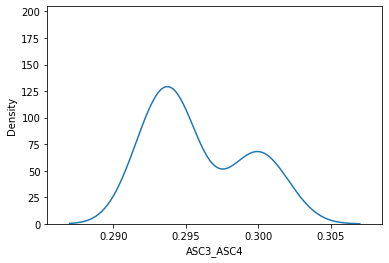

In [31]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC3_ASC4_Hmapped_distance_all)
xmean = np.mean(ASC3_ASC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC3_ASC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC3_ASC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC3_ASC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC3_ASC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.29636883186526664
parameter K is:  60734.19555934432


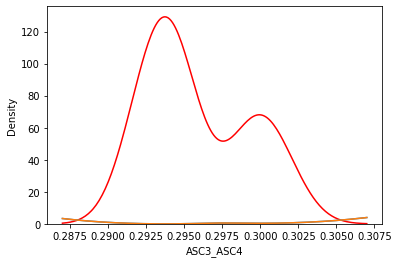

In [32]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC3_ASC4_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.294, 5000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC3_ASC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC4_ASC1_Hmapped_distance_all
Mean: Raw data 0.16319999999999998
Mode: Raw data 0.16301078720574352
Mode: Gauss-fitted 0.16301078720574352


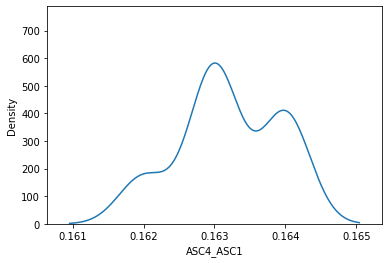

In [33]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC4_ASC1_Hmapped_distance_all)
xmean = np.mean(ASC4_ASC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(ASC4_ASC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC4_ASC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC4_ASC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC4_ASC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.1631366713090954
parameter K is:  1206762.5078816067


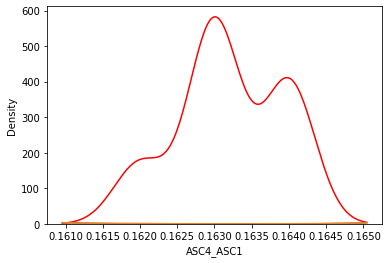

In [34]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC4_ASC1_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.163, 8000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC4_ASC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC2_ASC4_Hmapped_distance_all
Mean: Raw data 0.33225
Mode: Raw data 0.3299824790149667
Mode: Gauss-fitted 0.3299824790149667


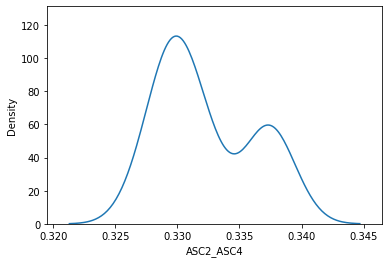

In [35]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC2_ASC4_Hmapped_distance_all)
xmean = np.mean(ASC2_ASC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC2_ASC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC2_ASC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC2_ASC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC2_ASC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

parameter R_o is:  0.33287442792206773
parameter K is:  48258.3037849373


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


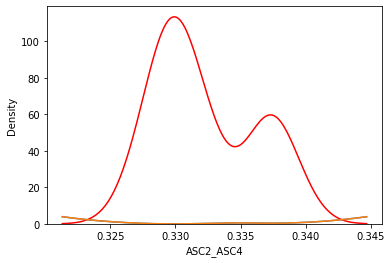

In [36]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC2_ASC4_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.33, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC2_ASC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


ASC1_ASC3_Hmapped_distance_all
Mean: Raw data 0.34199999999999997
Mode: Raw data 0.3405711166408565
Mode: Gauss-fitted 0.3405711166408565


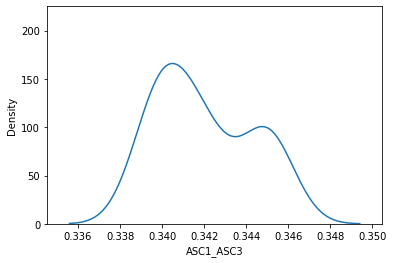

In [37]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(ASC1_ASC3_Hmapped_distance_all)
xmean = np.mean(ASC1_ASC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(ASC1_ASC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(ASC1_ASC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(ASC1_ASC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("ASC1_ASC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.3137246626013451
parameter K is:  2224.310473740111


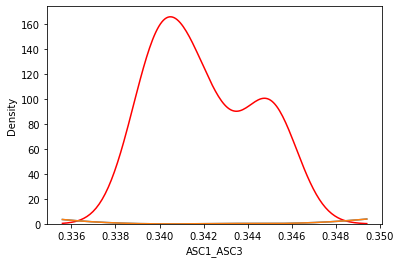

In [38]:
#get probability distribution from data
plt2 = sns.kdeplot(ASC1_ASC3_Hmapped_distance_all,bw=0.5,color='red')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('ASC1_ASC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


GSC1_GSC2_Hmapped_distance_all
Mean: Raw data 0.2987
Mode: Raw data 0.29633218972184305
Mode: Gauss-fitted 0.29633218972184305


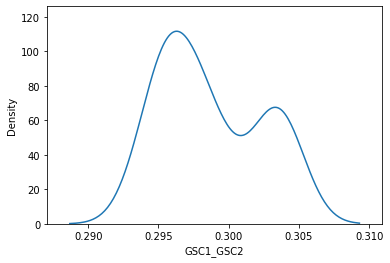

In [39]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC2_Hmapped_distance_all)
xmean = np.mean(GSC1_GSC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_GSC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

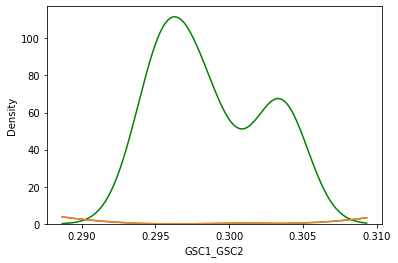

In [40]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC2_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.295, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC1_GSC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [ ]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC3_Hmapped_distance_all)
xmean = np.mean(GSC2_GSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC2_GSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC3_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC2_GSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [ ]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC3_GSC4_Hmapped_distance_all)
xmean = np.mean(GSC3_GSC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC3_GSC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC3_GSC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC3_GSC4_Hmapped_distance_all,bw=0.8)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC3_GSC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC3_GSC4_Hmapped_distance_all,bw=0.8,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.29, 100000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC3_GSC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [ ]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC4_GSC1_Hmapped_distance_all)
xmean = np.mean(GSC4_GSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC4_GSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC4_GSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC4_GSC1_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC4_GSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC4_GSC1_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.163, 200000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC4_GSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [ ]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC2_GSC4_Hmapped_distance_all)
xmean = np.mean(GSC2_GSC4_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(GSC2_GSC4_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC2_GSC4_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC2_GSC4_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC2_GSC4_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC2_GSC4_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.39, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC2_GSC4')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [ ]:


# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(GSC1_GSC3_Hmapped_distance_all)
xmean = np.mean(GSC1_GSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(GSC1_GSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(GSC1_GSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

# density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(GSC1_GSC3_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("GSC1_GSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

In [ ]:
#get probability distribution from data
plt2 = sns.kdeplot(GSC1_GSC3_Hmapped_distance_all,bw=0.5,color='green')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.34, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('GSC1_GSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [ ]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC1_CSC2_Hmapped_distance_all)
xmean = np.mean(CSC1_CSC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC1_CSC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC1_CSC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC1_CSC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC1_CSC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.023250236485915267
parameter K is:  40.3435501224426


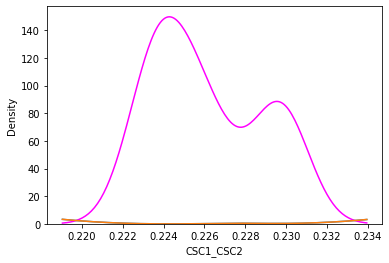

In [41]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC1_CSC2_Hmapped_distance_all,bw=0.5,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.22, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC1_CSC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC2_CSC3_Hmapped_distance_all
Mean: Raw data 0.28744999999999993
Mode: Raw data 0.2859337213467334
Mode: Gauss-fitted 0.2859337213467334


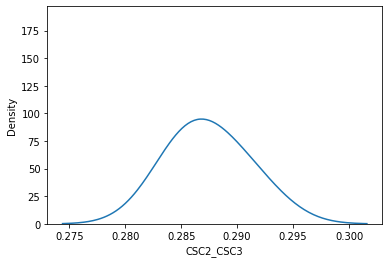

In [42]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC2_CSC3_Hmapped_distance_all)
xmean = np.mean(CSC2_CSC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC2_CSC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC2_CSC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC2_CSC3_Hmapped_distance_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC2_CSC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.15501500501839635
parameter K is:  125.04153515965504


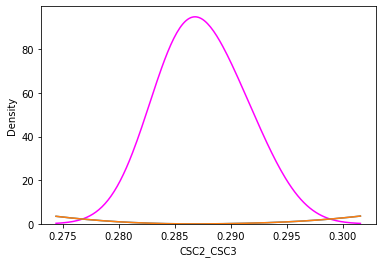

In [43]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC2_CSC3_Hmapped_distance_all,bw=1.2,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.28, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC2_CSC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


CSC3_CSC1_Hmapped_distance_all
Mean: Raw data 0.26975000000000005
Mode: Raw data 0.26785546081345246
Mode: Gauss-fitted 0.26785546081345246


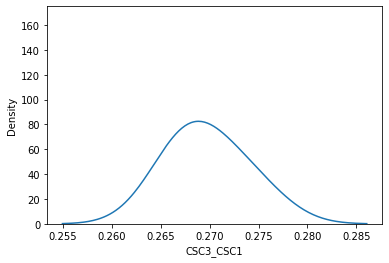

In [44]:
# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(CSC3_CSC1_Hmapped_distance_all)
xmean = np.mean(CSC3_CSC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(CSC3_CSC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(CSC3_CSC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(CSC3_CSC1_Hmapped_distance_all,bw=1.2)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("CSC3_CSC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2701613435202512
parameter K is:  27504.050278732397


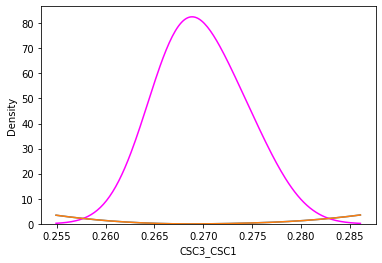

In [45]:
#get probability distribution from data
plt2 = sns.kdeplot(CSC3_CSC1_Hmapped_distance_all,bw=1.2,color='magenta')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.267, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('CSC3_CSC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC1_USC2_Hmapped_distance_all
Mean: Raw data 0.22475000000000006
Mode: Raw data 0.2225381095818276
Mode: Gauss-fitted 0.2225381095818276


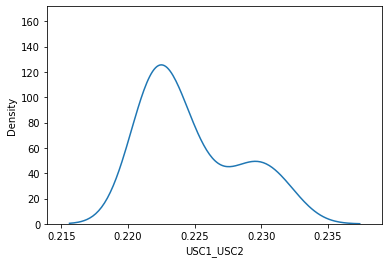

In [46]:


# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC1_USC2_Hmapped_distance_all)
xmean = np.mean(USC1_USC2_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC1_USC2_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC1_USC2_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC1_USC2_Hmapped_distance_all,bw=0.5)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC1_USC2_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


parameter R_o is:  0.2031076439946598
parameter K is:  3373.062788243923


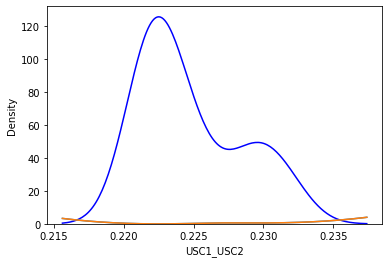

In [47]:
#get probability distribution from data
plt2 = sns.kdeplot(USC1_USC2_Hmapped_distance_all,bw=0.5,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.22, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC1_USC2')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC2_USC3_Hmapped_distance_all
Mean: Raw data 0.29085
Mode: Raw data 0.2905380681120944
Mode: Gauss-fitted 0.2905380681120944


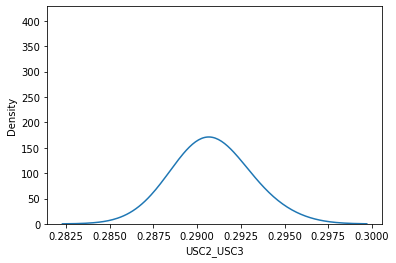

In [48]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC2_USC3_Hmapped_distance_all)
xmean = np.mean(USC2_USC3_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

# raw data plot
plt = sns.distplot(USC2_USC3_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




#histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC2_USC3_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC2_USC3_Hmapped_distance_all,bw=1.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC2_USC3_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])


/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

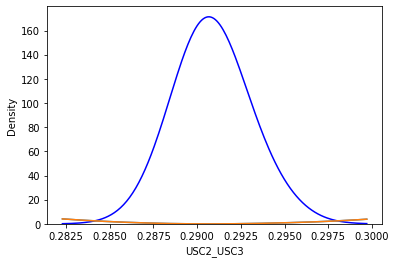

In [49]:
#get probability distribution from data
plt2 = sns.kdeplot(USC2_USC3_Hmapped_distance_all,bw=1.3,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.27, 1000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC2_USC3')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


USC3_USC1_Hmapped_distance_all
Mean: Raw data 0.2741
Mode: Raw data 0.2740109721321743
Mode: Gauss-fitted 0.2740109721321743


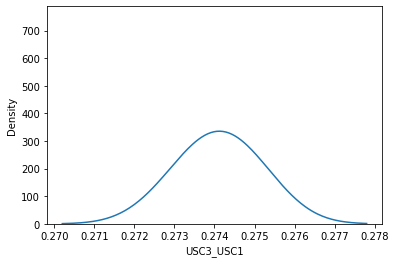

In [50]:

# Density Plot and Histogram 
from scipy import stats
xmedian = np.median(USC3_USC1_Hmapped_distance_all)
xmean = np.mean(USC3_USC1_Hmapped_distance_all)
# xmode = stats.mode(BB2_BB3_Hmapped_distance_all)[0][0] #gives wrong value

#raw data plot
plt = sns.distplot(USC3_USC1_Hmapped_distance_all, kde=True, 
            color = 'white',norm_hist=False,
             kde_kws={'linewidth': 1}
             )

x = plt.lines[0].get_xdata()
y = plt.lines[0].get_ydata()
maxid = np.argmax(y)
xmode = x[maxid]




# # #histogram plot + Density plot
# import matplotlib.pyplot as plt
# sns.displot(USC3_USC1_Hmapped_distance_all,bins=10)
# 
# 
# 

#density plot
import matplotlib.pyplot as plt
ax = sns.kdeplot(USC3_USC1_Hmapped_distance_all,bw=1.3)




x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
maxid = np.argmax(y)

print("USC3_USC1_Hmapped_distance_all")
print("Mean: Raw data",xmean)
print("Mode: Raw data",xmode)
print("Mode: Gauss-fitted",x[maxid])

/home/subhasree/.local/lib/python3.6/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

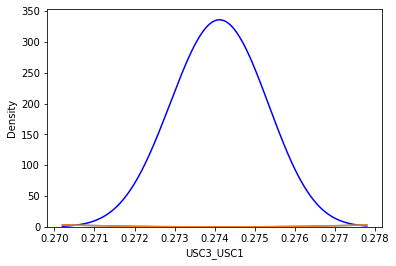

In [51]:
#get probability distribution from data
plt2 = sns.kdeplot(USC3_USC1_Hmapped_distance_all,bw=1.3,color='blue')
xdata = plt2.lines[0].get_xdata()
ydata = plt2.lines[0].get_ydata()

#calculate energy
U = P2U(ydata)
plt.plot(xdata,U)

#plot enegy and density
import matplotlib.pyplot as plt
plt.plot(xdata,U)

#get params
from scipy.optimize import curve_fit
params, pcov = curve_fit(harmonic, xdata, U, p0=[0.21, 50000])
print("parameter R_o is: ",params[0])
print("parameter K is: ",params[1])

distance_parameters_dict['Parameter'].append('USC3_USC1')
distance_parameters_dict['raw data mean value'].append(xmean)
distance_parameters_dict['raw data mode value gaussian-fitted mode value'].append(x[maxid])
distance_parameters_dict['Seed value obtained using BOltzmann inversion'].append(params[0])
distance_parameters_dict['K from boltzmann inversion'].append(params[1])

In [52]:
distance_parameters['Parameter'] = distance_parameters_dict['Parameter']
distance_parameters['raw data mean value'] = distance_parameters_dict['raw data mean value']
distance_parameters['raw data mode value gaussian-fitted mode value'] = distance_parameters_dict['raw data mode value gaussian-fitted mode value']
distance_parameters['Seed value obtained using BOltzmann inversion'] = distance_parameters_dict['Seed value obtained using BOltzmann inversion']
distance_parameters['K from boltzmann inversion'] = distance_parameters_dict['K from boltzmann inversion']
distance_parameters

,Parameter,raw data mean value,raw data mode value gaussian-fitted mode value,Seed value obtained using BOltzmann inversion,K from boltzmann inversion
0,BB3_pBB1,0.35175,0.339480,0.361826,1.161895e+03
1,BB1_BB2,0.32435,0.325586,0.378255,7.359380e+02
2,BB2_BB3,0.27045,0.269154,0.079038,7.696876e+01
3,BB3_ASC1,0.33855,0.338387,0.337079,1.113341e+04
4,BB3_USC1,0.33035,0.331029,0.330033,2.918078e+04
5,BB3_GSC1,0.33715,0.335513,0.339341,1.237342e+04
6,BB3_CSC1,0.33175,0.331538,0.332380,8.378918e+03
7,ASC1_ASC2,0.23470,0.233588,0.234815,5.085816e+04
8,ASC2_ASC3,0.27105,0.269285,0.272114,6.333495e+04
9,ASC3_ASC4,0.29585,0.293786,0.296369,6.073420e+04


In [55]:
distance_parameters.to_csv("/home/subhasree/IISC_Bangalore/My_PhD_Studies/Lab_work/CG_Models/PDB_files/all_parameters_distance.csv")

In [58]:
# all_atom_boltzmann_k = []
# experminetal_data_boltzmann_k = []

all_atom_boltzmann_param = [0.33,0.413507536,0.238850203,0.342819806,0.329592191,0.372390386,
                            0.255988348,0.231980789,0.269024043,0.294789579,0.164243595,0.32894312,
                            0.341013906,0.266151791,0.273986197,0.314005537,0.220783779]
experimental_data_boltzmann = [0.361825970355212,0.378254763209808,0.07903796385576,
                               0.33707948864604,0.330032727803216,0.339341363649104,0.332380369547876,0.234815441932567,0.272113671476981,0.296368831865267,0.163136671309095,0.332874427922068,0.313724662601345,0.023250236485915,0.155015005018396,0.270161343520251,0.20310764399466]

import numpy as np
print("correlation of distance : all_atom vs experimental")
print(np.corrcoef(all_atom_boltzmann_param, experimental_data_boltzmann))

# print("correlation of distance : gaussian vs boltzmann")
# print(np.corrcoef(gaussian_dist_data, boltzmann_dist_data))

correlation of distance : all_atom vs experimental
[[1.         0.68035124]
 [0.68035124 1.        ]]
